# Baseline Model for cs231n/bmi260 Project

Housekeeping / Preprocessing the data 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from skimage import transform
import pandas as pd
import torchvision.datasets as dset
import torchvision.transforms as T
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook

In [2]:

#Change to where your dataset is stored
scans_path = "/Users/magdy/Desktop/BMI260/Project/dataset/medgift.hevs.ch/ILD_DB_lungMasks"

list_of_scans = os.listdir(scans_path)
# for figuring out the controls lets experiment with slice 122 of slice 2
scan_num = 11
scan_path = os.path.join(scans_path,list_of_scans[scan_num])
list_of_slices = os.listdir(scan_path)
slice_num = 10
slice_path = os.path.join(scan_path,list_of_slices[slice_num])

# read in the full path to the file as ds
ds=pydicom.read_file(slice_path) # you may have to use pydicom instead of dicom 

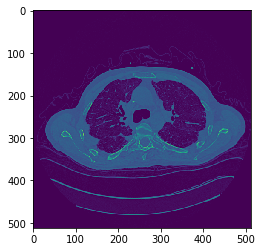

<class 'numpy.ndarray'> 279.5905418395996 uint16


In [3]:
rawimg= ds.pixel_array
plt.imshow(rawimg, cmap='viridis')
plt.show()
print(type(rawimg), np.mean(ds.pixel_array), rawimg.dtype)

In [4]:
num_scans = len(list_of_scans)
max_num_slices = 0

for scan_num in range(num_scans):
    scan_path = os.path.join(scans_path,list_of_scans[scan_num])
    if (not os.path.isdir(scan_path)) or (list_of_scans[scan_num] == "HRCT_pilot"):
        continue
    list_of_slices = os.listdir(scan_path)
    num_slices = len(list_of_slices)
    num_slices = len(list_of_slices)
    if (num_slices > max_num_slices):
        max_num_slices = num_slices

In [5]:
#maximum number of slices per scan 
max_num_slices = 62

X = np.zeros((num_scans-2, 512, 512, max_num_slices))
counter = 0;
#produce X array 
for scan_num in tnrange(num_scans):
    scan_path = os.path.join(scans_path,list_of_scans[scan_num])
    if (not os.path.isdir(scan_path)) or (list_of_scans[scan_num] == "HRCT_pilot"):
        continue
    list_of_slices = os.listdir(scan_path)
    num_slices = len(list_of_slices)
    scan_idx = int(list_of_scans[scan_num])
    
    for slice_num in range(num_slices):
        if (list_of_slices[slice_num][-4:] != ".dcm"):
            continue
            
        slice_path = os.path.join(scan_path,list_of_slices[slice_num])
        ds=pydicom.read_file(slice_path)
        hu_img = ds.RescaleIntercept + ds.pixel_array*ds.RescaleSlope
        if(hu_img.shape != (512,512)):
            hu_img = transform.resize(hu_img, (512,512))
            
        slice_idx_num = int(ds.InstanceNumber)
        X[counter, :, :, slice_idx_num] = hu_img
    counter += 1
    
print(X.shape)
np.save("X", X)

HBox(children=(IntProgress(value=0, max=105), HTML(value='')))

/Users/magdy/anaconda3/envs/cs231n/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "



(103, 512, 512, 62)


In [7]:
df=np.asarray(pd.read_csv('labels.csv', sep=',',header=None).values)
y = np.zeros((X.shape[0], 1))

counter = 0
for scan_num in tnrange(num_scans):
    
    #get rid of other entries in dir 
    scan_path = os.path.join(scans_path,list_of_scans[scan_num])
    if (not os.path.isdir(scan_path)) or (list_of_scans[scan_num] == "HRCT_pilot"):
        continue
    
    idx = np.where(df == int(list_of_scans[scan_num]))[0][0]
    y[counter] = df[idx, 1]
    counter+=1
np.save("y", y)

HBox(children=(IntProgress(value=0, max=105), HTML(value='')))